# Quelques méthodes moyen-niveau

## Introduction 

Lors des précédentes séances, nous avons vu comment :

- construire et mesurer un circuit quantique ;
- implémenter une méthode permettant de rajouter une porte quantique à un circuit ;
- implémenter la transformée de Fourier quantique pour un nombre donné de qubits.

Tout ceci nous sera utile dans ce Jupyter Notebook. Ainsi, dans le cadre de séance, nous verrons :

- comment implémenter la transformée de Fourier quantique inverse ;
- comment implémenter une estimation de phase.

A la fin du cours, vous devrez téléverser sur le Moodle votre notebook que vous aurez pris le soin de renommer sous la forme *09-11-2020 Nom Prénom*.

### Nom et prénom


Commençons par inscrire votre nom et prénom en tant qu'objet string nom_prenom. Nous utiliserons comme convention :

- Un _ séparera le nom et le prénom.

Ainsi :

- Pour Jean Philippe Arias Zapata (le tiret est une longue histoire...), nom_prenom = 'Arias Zapata_Jean Philippe ; 
- Pour Jean-Pierre Pernault, nom_prenom = 'Pernault_Jean-Pierre'.

In [ ]:
nom_prenom = 

## Transformée de Fourier quantique inverse

Lors de la précédente séance, nous avions appris à implémenter la transformée de Fourier quantique sur deux, trois et quatre qubits. De plus, en bonus, il y avait un exercice pour généraliser l'application de notre méthode *QFT* pour les registres quantiques de n'importe quelle taille.

Dans cette partie, nous tenterons d'implémenter l'opération inverse à la méthode *QFT* que nous nommerons *inverse_QFT*. Nous décomposerons cet exercice en plusieurs étapes :

- nous commencerons par voir (ou revoir pour certains) la méthode *QFT* qui permet de généraliser la transformée de Fourier quantique pour n'importe quel registre quantique ;
- puis nous chercherons les portes inverses aux portes qui composent la méthode *QFT* ;
- enfin nous implémenterons *inverse_QFT* en tant qu'inverse de la méthode *QFT* ;
- finalement nous testerons la méthode *inverse_QFT* nouvellement implémentée grâce au circuit quantique de Bell.

### Lecture de la méthode *QFT*

La méthode *QFT* comme proposée précédemment nécessite trois autres méthodes :

- la méthode *porte_SWAP* ;
- la méthode *do_swaps* ;
- la méthode *R*.

La méthode *porte_SWAP* sert, on se rappelle, à échanger les états de deux qubits. La voici :

In [ ]:
from qiskit.circuit import Qubit

def porte_SWAP(circuit, qubits):
    
    if type(circuit) == QuantumCircuit:
        
        if len(qubits) == 2:
            
            if type(qubits[0]) == Qubit and type(qubits[1]) == Qubit:
                circuit.cx(qubits[0], qubits[1])
                circuit.cx(qubits[1], qubits[0])    
                circuit.cx(qubits[0], qubits[1])
            
            elif type(qubits[0]) == int and type(qubits[1]) == int:
                q = circuit.qubits
                circuit.cx(q[qubits[0]], q[qubits[1]])
                circuit.cx(q[qubits[1]], q[qubits[0]])    
                circuit.cx(q[qubits[0]], q[qubits[1]])
                
    return circuit

La méthode *do_swaps* va employer la méthode *porte_SWAP* pour échanger deux par deux les états des qubits d'un registre au complet telle que :

- l'état du premier qubit soit échangé avec celui du dernier qubit ;
- l'état du second qubit soit échangé avec celui de l'avant-dernier qubit ;
- etc. ;

et telle que si le nombre de qubits est impair, l'état du qubit central soit inchangé.

Ceci permettra de rester dans la convention *LSBF* même après action de la méthode *QFT* :

In [ ]:
def do_swaps(circuit, registre):
    for i in range(len(registre) // 2) :
        circuit = porte_SWAP(circuit, [registre[i], registre[len(registre) - 1 - i]])
    return circuit

Finalement, la méthode *R* était utile pour constater la récurrence qui pouvait apparaître lors de l'implémentation de *QFT* :

In [ ]:
from math import pi

def R(k, circuit, qubit_controle, qubit_cible):    
    circuit.cu1(pi/2**k, qubit_controle, qubit_cible)
    return circuit

Cela nous donne enfin la méthode *QFT* avec la variable optionnelle *to_swap* qui permet d'appliquer ou non la méthode *do_swaps* :

In [ ]:
def QFT(circuit, registre, to_swap=True):
    
    for i in range(len(registre)):
        circuit.h(registre[i])
        
        for distance in range(len(registre) - i - 1):
            distance = distance + 1
            circuit = R(distance, circuit, registre[i + distance], registre[i])
            
    if to_swap:
        circuit = do_swaps(circuit, registre)
            
    return circuit

### Les portes inverses

Pour inverser une méthode composée d'instructions, il s'agit de :

- trouver les instructions inverses à celles qui composent la méthode ;
- inverser l'ordre des instructions en les ayant remplacé par les instructions inverses.

Pour ceux familiers avec l'algèbre linéaire, si nous avons la méthode représentable par une matrice $M = A \cdot B$, il s'agit de trouver la méthode inverse associée à $M^{-1} = \left(A \cdot B\right)^{-1} = B^{-1} \cdot A^{-1}.$

*Remarque : Une méthode ou une instruction $\mathcal{K}_1$ est l'inverse d'une autre méthode ou instruction $\mathcal{K}_2$ si et seulement si les sorties sont identiques aux entrées après l'action consécutive des méthodes $\mathcal{K}_1$ et $\mathcal{K}_2$, et ce pour toutes entrées possibles.*

Lorsque je dirais *Démontrez que c'est l'inverse de...*, il faut bien sûr comprendre que vous ne pourrez pas tester cette propriété pour toutes entrées possibles (au risque de vous prendre un temps infini...). Utilisez un seul cas qui vous semble parlant.

**1) Démontrez que la porte Hadamard est son propre inverse sur le circuit suivant.**

In [ ]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

simulator = Aer.get_backend('qasm_simulator')

q_test = QuantumRegister(1)
c_test = ClassicalRegister(1)
circ_test = QuantumCircuit(q_test, c_test)

circ_test.x(q_test)

#Faites agir les portes ici


#N'oubliez pas la mesure !

job_test = execute(circ_test, simulator, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
res_test = job_test.result().get_counts()
print(res_test)

In [ ]:
assert res_test['1'] == 1000

**2) Démontrez que la méthode** *do_swaps* **est son propre inverse sur le circuit suivant.**

In [ ]:
q_test = QuantumRegister(4)
c_test = ClassicalRegister(4)
circ_test = QuantumCircuit(q_test, c_test)

circ_test.x([q_test[0], q_test[2]])

#Faites agir les portes ici


#N'oubliez pas la mesure !

job_test = execute(circ_test, simulator, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
res_test = job_test.result().get_counts()
print(res_test)

In [ ]:
assert res_test['0101'] == 1000

Nous proposons maintenant la méthode suivante *inverse_R* qui sera utile pour l'implémentation de *inverse_QFT* :

In [ ]:
def inverse_R(k, circuit, qubit_controle, qubit_cible):
    circuit.cu1(-pi/2**k, qubit_controle, qubit_cible)
    return circuit

**3) Démontrez que la méthode** *inverse_R* **est l'inverse de la méthode** *R* **sur le circuit suivant.**

In [ ]:
q_test = QuantumRegister(2)
c_test = ClassicalRegister(2)
circ_test = QuantumCircuit(q_test, c_test)

circ_test.x(q_test)

k = 1

#Faites agir les portes ici


#N'oubliez pas la mesure !

job_test = execute(circ_test, simulator, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
res_test = job_test.result().get_counts()
print(res_test)

In [ ]:
assert res_test['11'] == 1000

Je vous partage une dernière astuce qui vous sera utile : normalement vous savez déjà comment vous "baladez" avec un indice dans une liste en suivant l'ordre de ces éléments :

In [ ]:
n = 5
for i in range(n):
    print(i)

Vous aurez besoin de le faire en suivant l'ordre exactement inverse des éléments d'une liste :

In [ ]:
for i in range(n):
    print(n - i - 1)

### Implémentation de *inverse_QFT*

Nous sommes maintenant capable d'inverser les éléments qui composent la méthode *QFT*.

Pour finalement implémenter *inverse_QFT*, il s'agit maintenant de remplacer les éléments de *QFT* par leur inverse respective tout en faisant attention à inverser leur ordre d'apparition. Autrement dit :

In [ ]:
def dummy():
    instruction1
    instruction2
    instruction3

Son inverse est :

In [ ]:
def inverse_dummy():
    inverse_instruction3
    inverse_instruction2
    inverse_instruction1

**Implémentez** *inverse_QFT.*

In [ ]:
def inverse_QFT(circuit, registre, to_swap=True):
    

### Vérification de la méthode inverse_QFT

Nous allons maintenant vérifier que la méthode *inverse_QFT* nouvellement implémentée soit vraiment la transformée de Fourier quantique inverse. Nous le répétons : il suffit de faire les opérations *QFT* et *inverse_QFT* de suite, et si l'action combinée de ces opérations est une non-action (s'il ne se passe rien), nous aurons bien montrer que *inverse_QFT* est l'inverse de *QFT*.

Le circuit de Bell nous permettra de faire ce test.

**1) Implémentez le circuit quantique de Bell.**

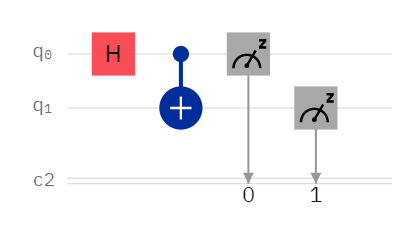

In [ ]:
circ_test =



job_test = execute(circ_test, simulator, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
print(job_test.result().get_counts())

**2) Faites de même en ayant rajouté avant mesures la transformée de Fourier quantique et votre méthode implémentée** *inverse_QFT.*

In [ ]:
circ_test = 


job_test = execute(circ_test, simulator, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
print(job_test.result().get_counts())

Les résultats sont-ils similaires ? Si c'est le cas, vous pouvez continuer dans le Jupyter Notebook.

## Estimation de phase

L'estimation de phase est un algorithme quantique très particulier et très utilisé pour les méthodes Monte-Carlo quantiques puisqu'il permet de construire un estimateur d'amplitude (cf. *Quantum Amplitude Amplification and Estimation* de Brassard et al., 2000), l'amplitude pouvant contenir des informations sur un problème donné (la probabilité d'obtenir une mesure donnée correspondant à un phénomène physique, d'ingénierie etc.). 


Nous pouvons le résumer ainsi : supposons que nous ayons un opérateur quantique $U$ qui soit un oracle, i. e. une boîte noire dont nous ne connaissons rien à part un état propre |$\psi$> mais sans savoir quelle est sa valeur propre :

$$U | \psi> = e^{i \phi} | \psi >.$$

L'objectif de cet algorithme est d'obtenir cette valeur propre. En pratique, l'algorithme donnera la valeur $z$ telle que $$\phi = \frac{2 \pi \, z}{2^n}$$

avec $n$ le nombre de qubits.

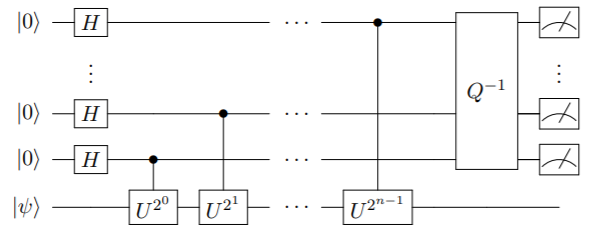

Nous constatons qu'il faut diviser les qubits en deux registres :

- un premier registre qui sera le seul mesuré ;
- un second registre où sera implémenté l'état quantique $| \psi >$ de même dimension que le premier registre.

Nous décomposerons cette partie en trois sous-parties :

- un exemple d'application de l'algorithme d'estimation de phase ;
- un exercice-bonus avec pour oracle NOT sur un registre de dimension 1 ;
- un exercice-bonus sur un registre de dimension 2.


### Exemple d'application de l'algorithme d'estimation de phase

Commençons par un exemple d'oracle *exemple_oracle* tel que :

- il s'applique sur un registre quantique de dimension 1 ;
- il dépend d'un paramètre *z* que nous choisirons arbitrairement ne prenant que les valeurs 0 ou 1 ;
- l'état |1> en soit un état propre.

In [ ]:
def exemple_oracle(z, circuit, registre_dim1):
    n = len(registre_dim1)
    angle = 2 * pi * z / 2**n
    circuit.u1(angle, registre_dim1)
    return circuit

Du circuit générique présenté ci-dessus, nous constatons que nous avons besoin de contrôler *exemple_oracle*. Faisons-le manuellement :

In [ ]:
def c_exemple_oracle(z, circuit, etat_propre_dim1, registre_mesure_dim1):
    n = len(registre_mesure_dim1)
    angle = 2 * pi * z / 2**n
    circuit.cu1(angle, registre_mesure_dim1, etat_propre_dim1)
    return circuit

Etant donné que nous resterons sur deux registres quantiques de dimension 1, il n'y aura pas besoin d'utiliser des puissances de l'oracle. Créons maintenant le circuit quantique *exemple_circ* pour l'estimation de phase :

In [ ]:
n = 1
registre_mesure = QuantumRegister(n)
registre_etat_propre = QuantumRegister(n)
clbits = ClassicalRegister(n)

exemple_circ = QuantumCircuit(registre_mesure, clbits)
exemple_circ.add_register(registre_etat_propre)

La structure du circuit quantique *exemple_circ* est prête, il s'agit maintenant de faire agir l'estimation de phase. Voici le circuit quantique (attention, qft devrait être remplacé par inverse_qft !) :

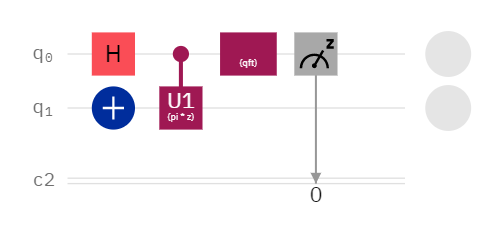

Il faut bien comprendre que le NOT agissant sur le second qubit prépare l'état propre |1> de notre oracle *exemple_oracle*.

**1) Préparez l'état propre.**

**2) Appliquez maintenant l'algorithme d'estimation de phase.**

In [ ]:
z = 1

In [ ]:
exemple_circ.draw(output='mpl')

**3) Vérifiez que lorsque vous prenez z = 0, vous obtenez en résultat 0, et lorsque vous prenez z = 1, vous obtenez 1.**

*Remarque : Faites bien attention à réinitialiser le circuit quantique !*

In [ ]:
exemple = execute(exemple_circ, simulator, shots=1000).result().get_counts()
print(exemple)

In [ ]:
if z%2 == 0:
    assert exemple['0'] == 1000
    
else :
    assert exemple['1'] == 1000

Ceci correspond à :

- soit obtenir une valeur propre $e^{i 0} = 1$ pour z = 0 ;
- soit obtenir une valeur propre $e^{i \pi} = - 1$ pour z = 1.

### Exercice-bonus : Oracle NOT

Nous choisirons cette fois comme oracle la porte NOT qui bien sûr n'agit que sur des registres quantiques de dimension 1. Nous donnerons comme état propre :

$$|-> = H (NOT) |0> = Z H |0>.$$

**1) Construisez l'oracle contrôlé** *c_NOT* **de la même manière que précédement :**

In [ ]:
def c_NOT(circuit, etat_propre_dim1, registre_mesure_dim1):
    circuit.cx(registre_mesure_dim1, etat_propre_dim1)
    return circuit

**2) Préparez la structure globale du circuit que nous nommerons** *circ_not :*

**3) Préparez l'état propre.**

**4) Appliquez maintenant l'algorithme d'estimation de phase.**

In [ ]:
circ_not.draw(output='mpl')

In [ ]:
res_not = execute(circ_not, simulator, shots=1000).result().get_counts()
print(res_not)

In [ ]:
assert res_not['1'] == 1000

Le fait qu'on obtienne la valeur 1 pour notre état propre revient à dire que nous obtenons la valeur propre $e^{i \pi} = -1$.

### Exercice-bonus

Nous allons maintenant nous arrêter sur un oracle *oracle2* qui peut s'appliquer sur un registre quantique de dimension 2, tels que ses états propres sont les états fondamentaux |00>, |10>, |01>, |11> : 

In [ ]:
def oracle2(z, circuit, registre_quantique_dim2):
    n = len(registre_quantique_dim2)
    angle = 2 * pi * z / 2**n
    circuit.u1(angle, registre_quantique_dim2[0])
    return circuit

Cette fois, nous prendrons pour le paramètre $z$ les valeurs entières de 0 à 3.

**Construisez l'oracle contrôlée associée** *c_oracle2.*

In [ ]:
def c_oracle2(z, circuit, registre_etat_propre, qubit_controle):
    n = len(registre_etat_propre)
    angle = 2 * pi * z / 2**n
    circuit.cu1(angle, qubit_controle, registre_etat_propre[0])
    return circuit

**Préparez la structure globale du circuit quantique.**

**Préparez l'état propre que vous souhaitez.**

**Appliquez maintenant l'estimation de phase.**

In [ ]:
z = 2

In [ ]:
circ.draw(output='mpl')

In [ ]:
resultats1 = execute(circ, simulator, shots=1000).result().get_counts()
print(resultats1) #On est dans la convention LSBF !!! Attention !!!!

**Amusez-vous à faire varier le paramètre** *z* **puis faites de même avec l'état propre.**

*Remarque : une nouvelle fois, n'oubliez pas de réinitialiser le circuit au complet !*